In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df =pd.read_csv('avocado.csv',index_col=0)
df = df.sort_values('Date')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,930734,384481,61528,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,118935,1562827,0,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,16168,20696,0,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,301304,3545688,15617,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,127,11295,0,374.35,186.67,187.68,0.0,organic,2015,Boise


In [23]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.537530e+07,2.621284e+07,2.090020e+06,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.148342e+08,1.125761e+08,1.034856e+07,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,6.419400e+04,2.443850e+05,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,6.666670e+05,2.167078e+06,1.390000e+04,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,9.292186e+06,1.182517e+07,5.094230e+05,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+09,2.047057e+09,2.546439e+08,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 51 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  int64  
 4   4225          18249 non-null  int64  
 5   4770          18249 non-null  int64  
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 1.9+ MB


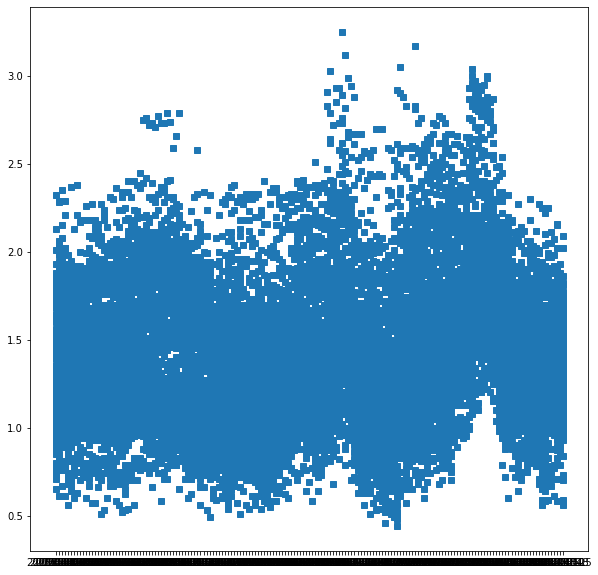

In [30]:
plt.figure(figsize = (10,10))
plt.plot(df['Date'], df['AveragePrice'],'s')
plt.show()

C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 1080x720 with 0 Axes>

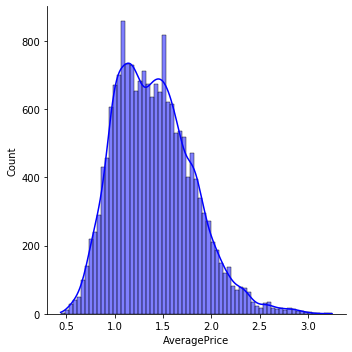

In [16]:
plt.figure(figsize = (15,10))

sns.displot(df['AveragePrice'],color = 'b', kde =True)
plt.show()

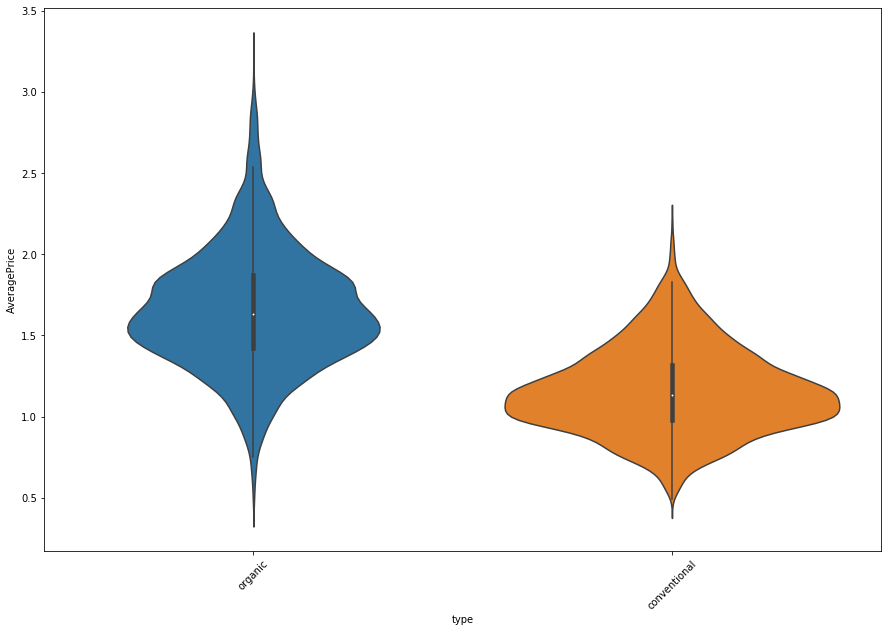

In [18]:
plt.figure(figsize = (15,10))
sns.violinplot(data=df, y ='AveragePrice', x= 'type')
plt.xticks(rotation = 45)
plt.show()

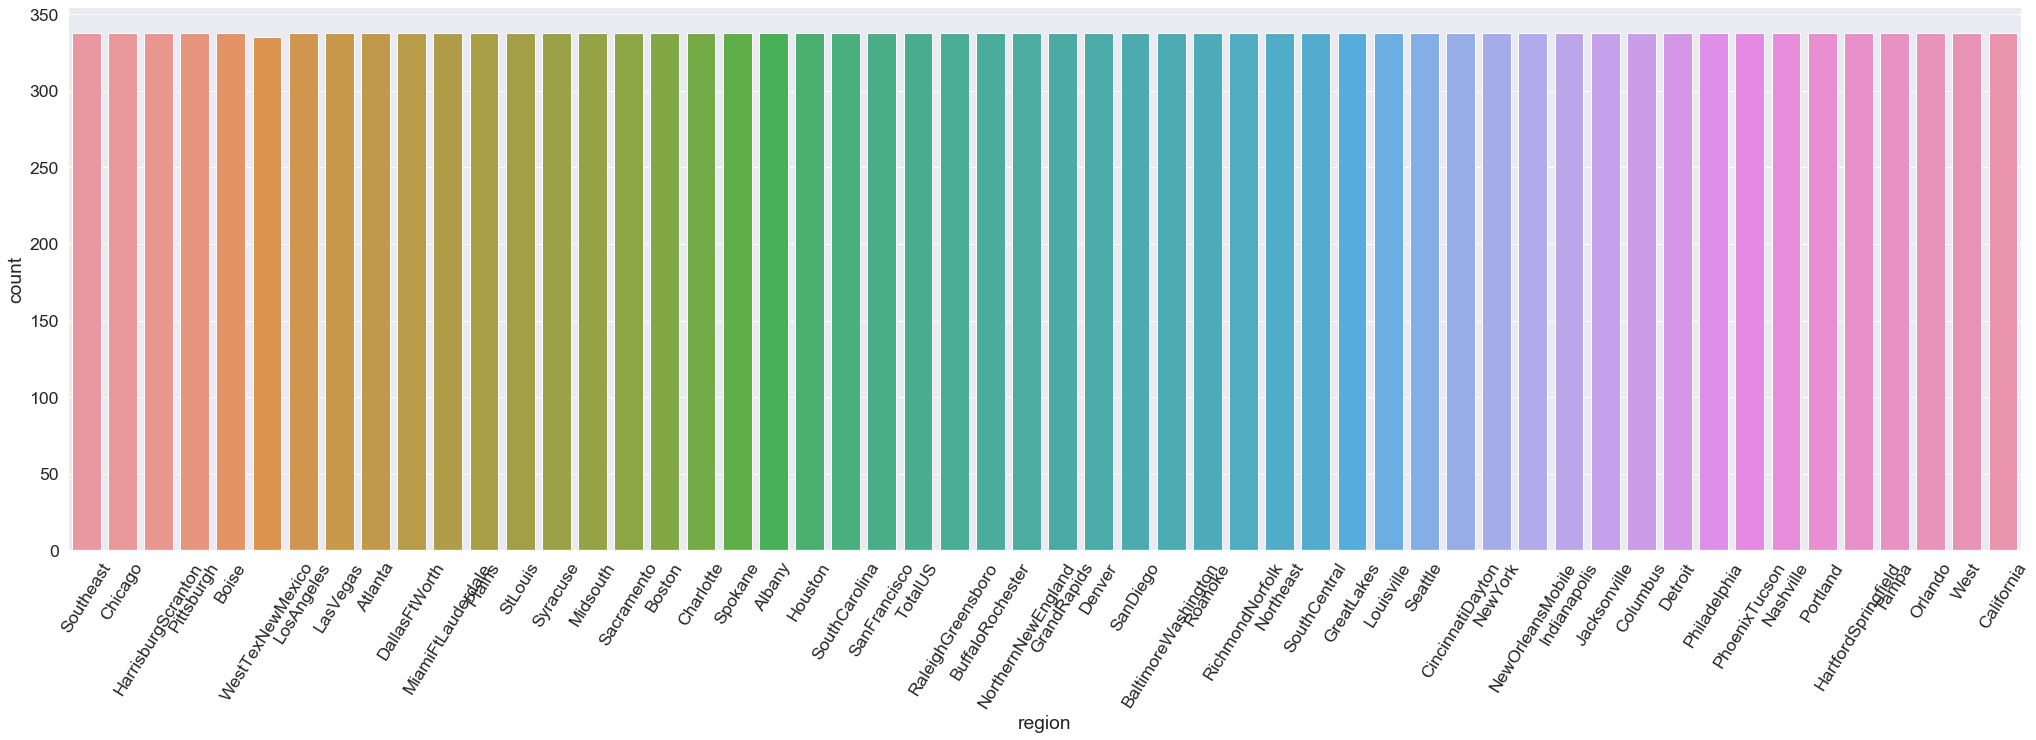

In [29]:
sns.set(font_scale=1.6)
plt.figure(figsize = (35,10))
sns.countplot(x='region', data = df)

plt.xticks(rotation = 58)
plt.show()

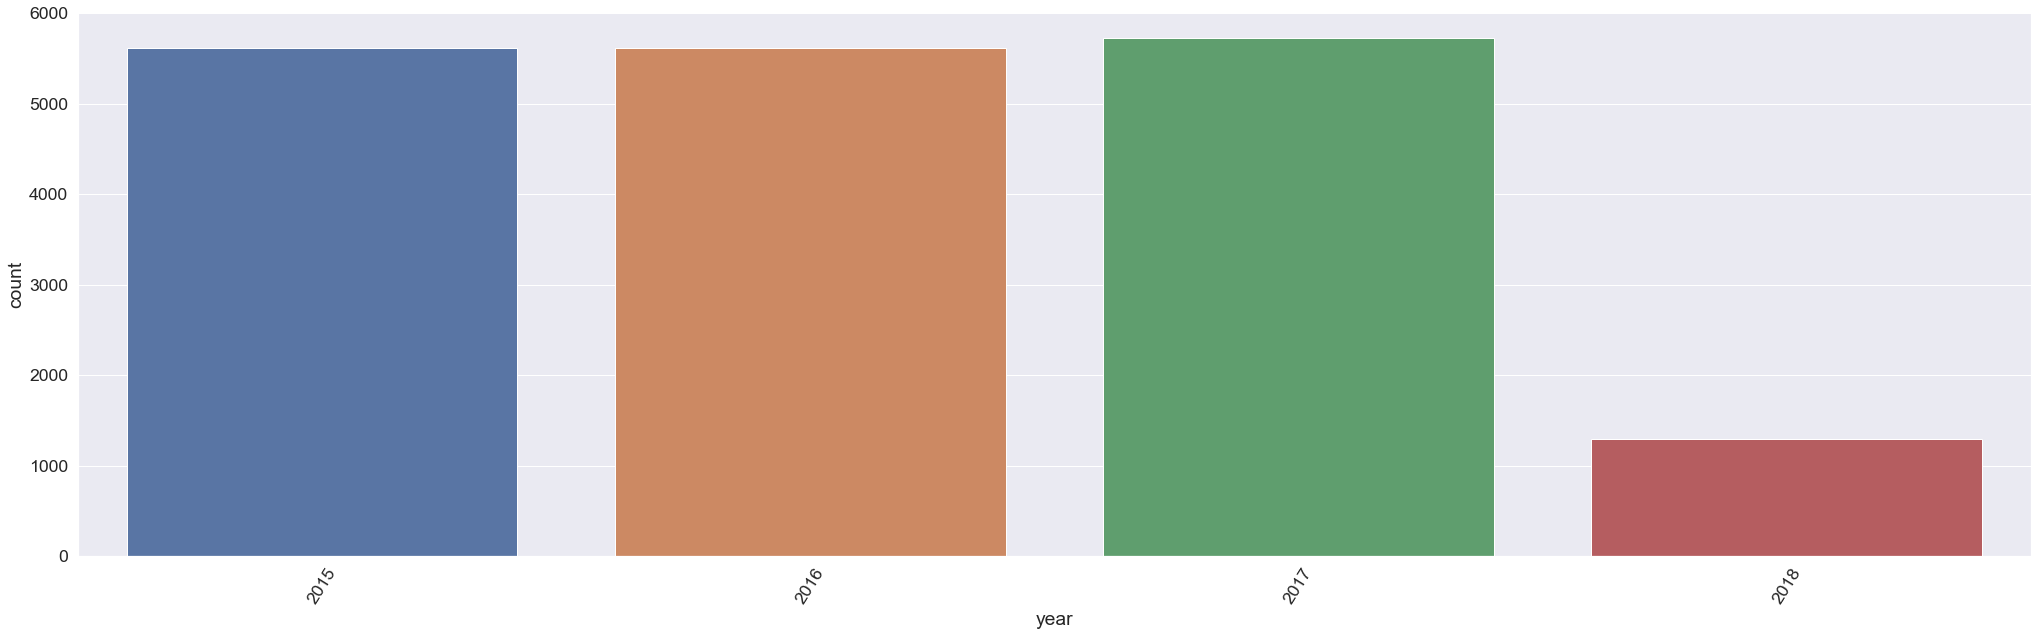

In [30]:
sns.set(font_scale=1.6)
plt.figure(figsize = (35,10))
sns.countplot(x='year', data = df)

plt.xticks(rotation = 58)
plt.show()

In [50]:
df_conventional = df[df['type']=='conventional']
df_organic = df[df['type']=='organic']

C:\Users\Basti\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2520x3600 with 0 Axes>

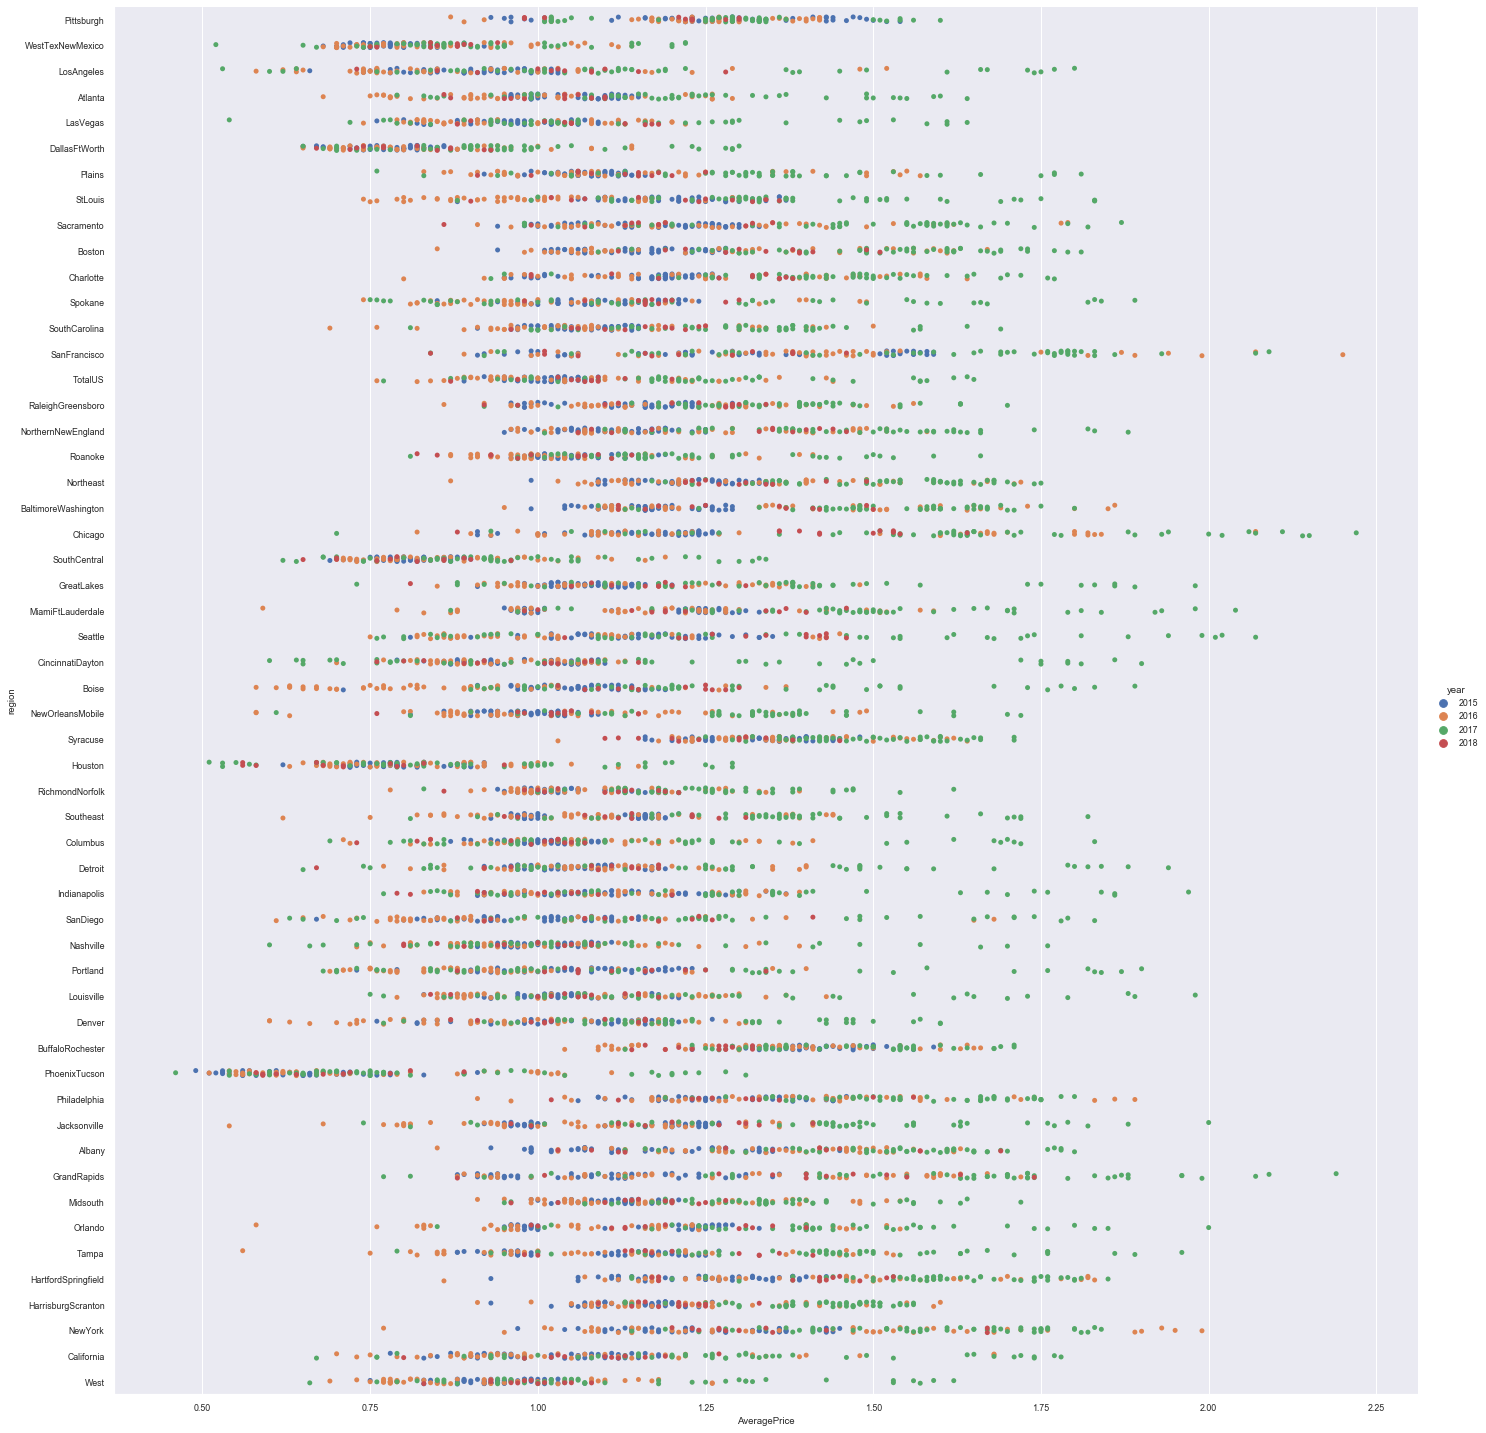

In [49]:
sns.set(font_scale=0.8)
plt.figure(figsize = (35,50))

sns.catplot('AveragePrice', 'region', data = df_conventional,hue='year', height = 20)

C:\Users\Basti\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


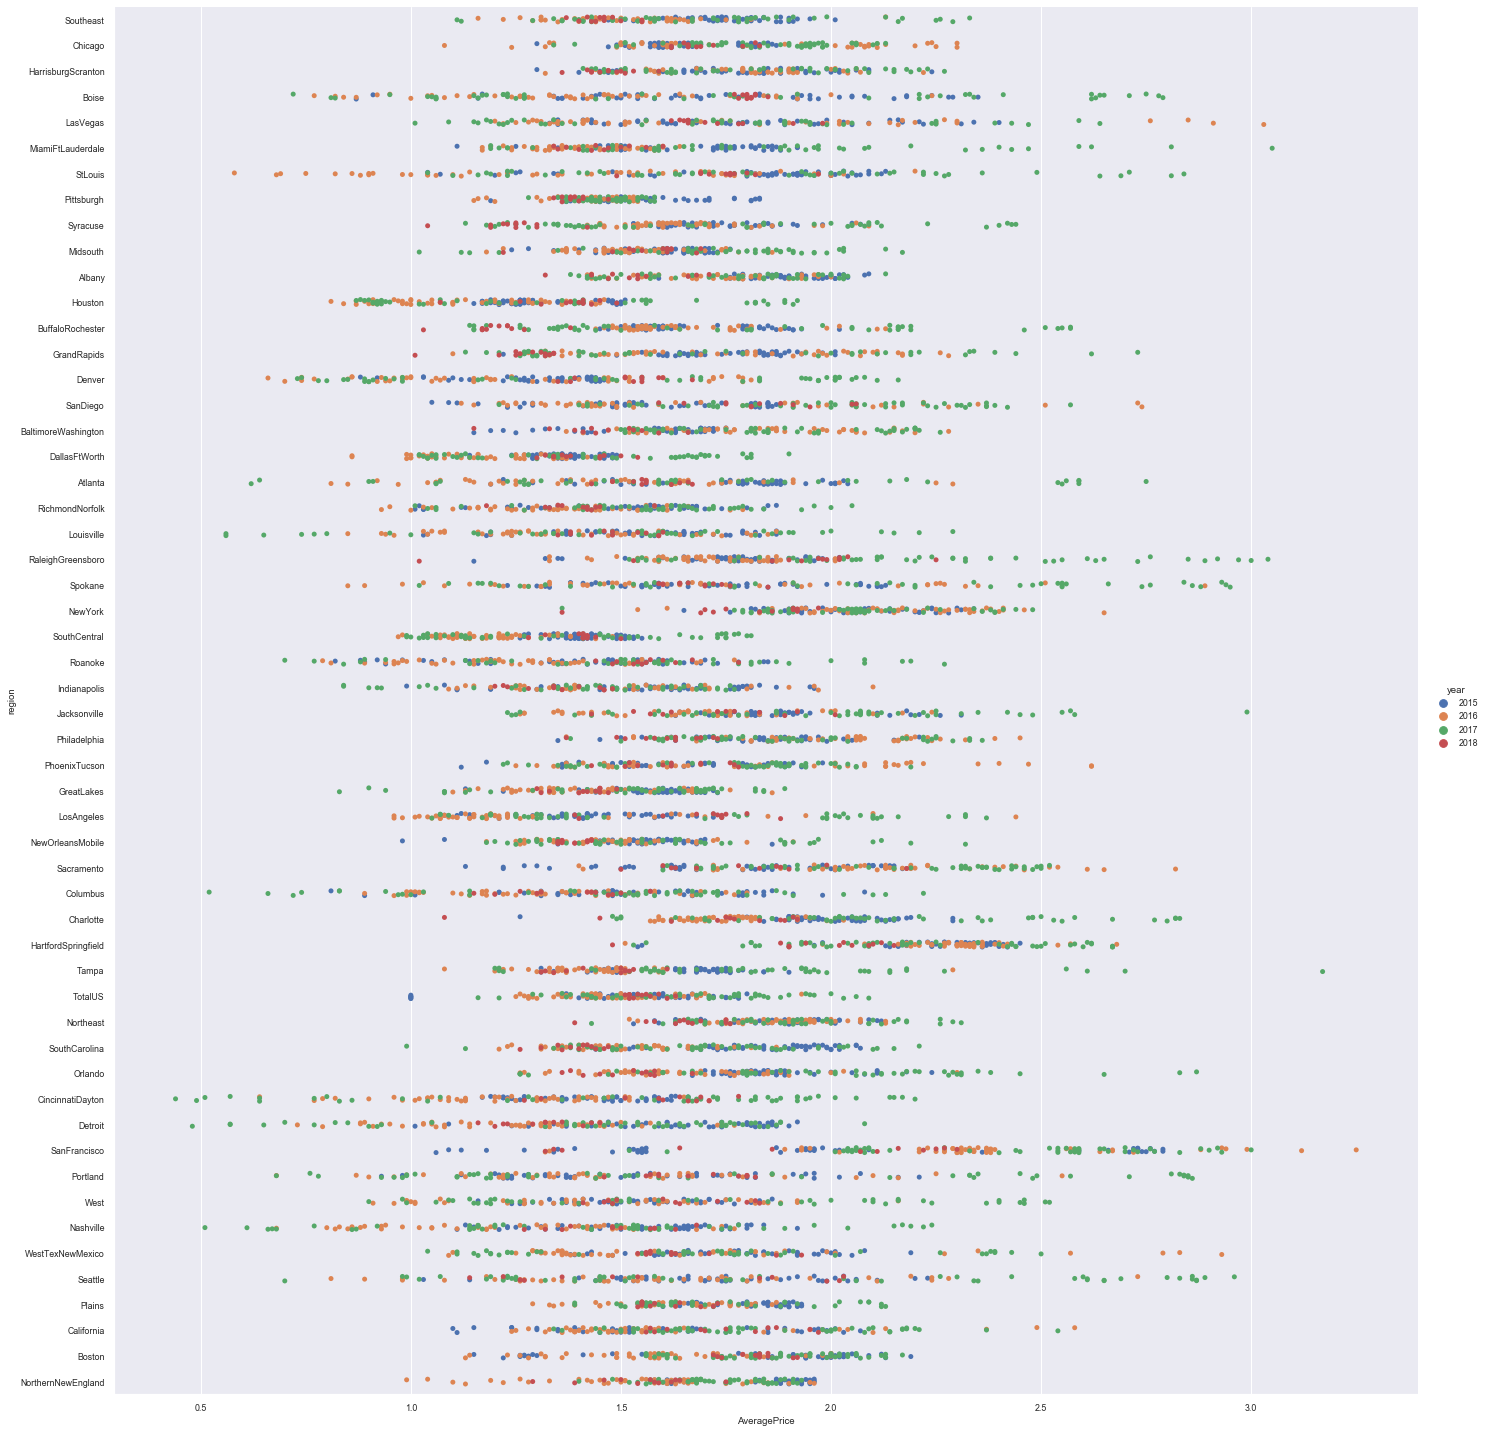

In [51]:
sns.set(font_scale=0.8)


sns.catplot('AveragePrice', 'region', data = df_organic,hue='year', height = 20)

In [57]:
df_prophet =  df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
df_prophet = df_prophet[['ds', 'y']]
df_prophet

,ds,y
51,2015-01-04,1.75
51,2015-01-04,1.49
51,2015-01-04,1.68
51,2015-01-04,1.52
51,2015-01-04,1.64
...,...,...
0,2018-03-25,1.36
0,2018-03-25,0.70
0,2018-03-25,1.42
0,2018-03-25,1.70


In [59]:
m = Prophet()
m.fit(df_prophet)

14:58:21 - cmdstanpy - INFO - Chain [1] start processing
14:58:24 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = m.make_future_dataframe(periods=365)
forecast= m.predict(future)

C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


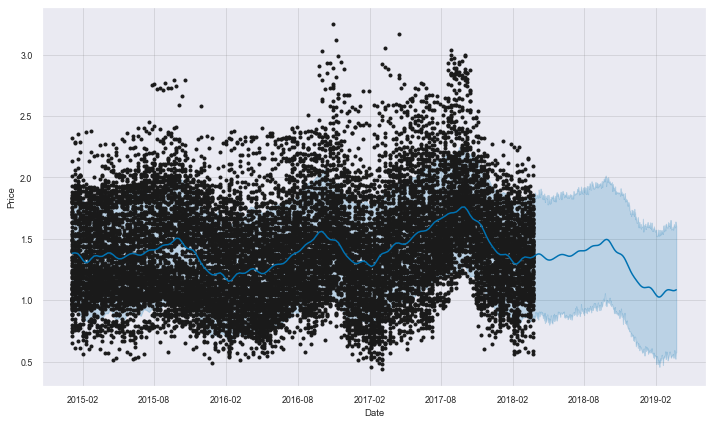

In [73]:
figure = m.plot(forecast,xlabel = 'Date' , ylabel = 'Price')

C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


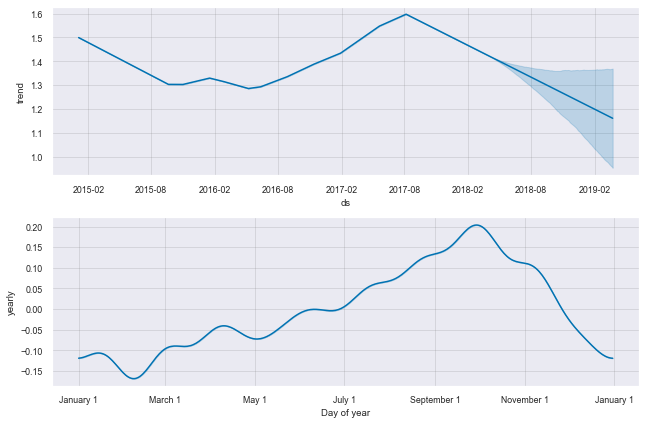

In [75]:
figure2= m.plot_components(forecast)

In [83]:
df_sample = df[df['region']=='West']
df_sample = df_sample.sort_values('Date')


C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


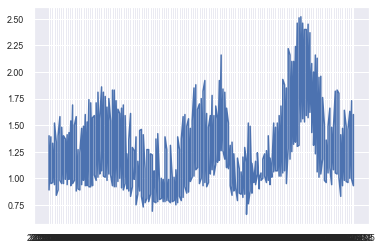

In [85]:
plt.plot(df_sample['Date'], df_sample['AveragePrice'])

In [88]:
df_prophet_Sample =  df_sample.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
df_prophet_Sample = df_prophet_Sample[['ds', 'y']]
df_prophet_Sample

,ds,y
51,2015-01-04,1.40
51,2015-01-04,0.89
50,2015-01-11,1.39
50,2015-01-11,0.95
49,2015-01-18,0.96
...,...,...
2,2018-03-11,1.00
1,2018-03-18,1.73
1,2018-03-18,0.99
0,2018-03-25,0.93


In [91]:


m = Prophet()
m.fit(df_prophet_Sample)
future = m.make_future_dataframe(periods=2365)
forecast= m.predict(future)

15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


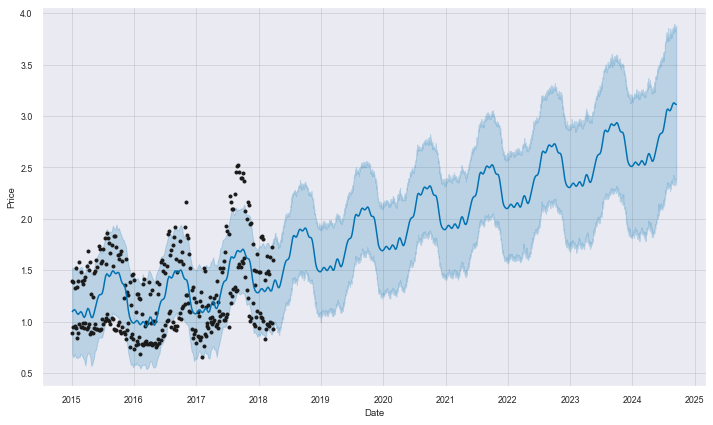

In [92]:
figure = m.plot(forecast,xlabel = 'Date' , ylabel = 'Price')

C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Basti\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


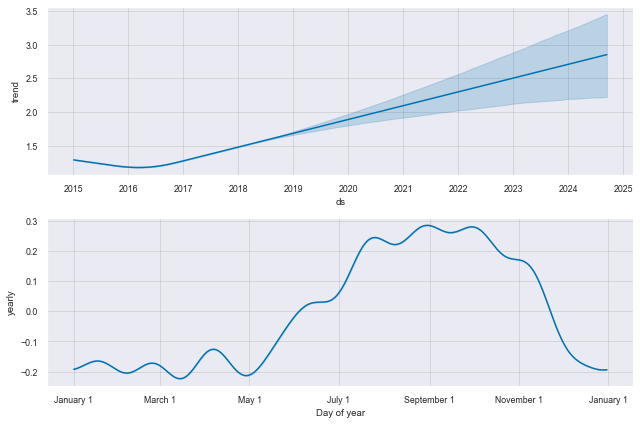

In [93]:
figure2= m.plot_components(forecast)

In [94]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,204696,15292,0,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,11917,34315,0,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,119192,245279,72794,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,152763,298104,72701,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,289477,235613,22453,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico
